- diff lr per layer
- TTA
- snapshot ensemble
- CV
- 2x2 avg pool?
- unfreeze all bn 1 epoch then freeze

## Start

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

from sklearn.metrics import fbeta_score

In [3]:
def f2(preds, targs):
    return max([fbeta_score(targs, (preds>th), 2, average='samples') 
                for th in [0.17,0.18,0.19,0.20,0.21,0.22,0.23]])

In [4]:
bs=48; sz=64; metrics=[f2]
f_model = resnet34
path = "/data/jhoward/fast/planet/"

## Train

In [5]:
n=len(list(open(f'{path}train_v2.csv')))-1
val_pct=0.2
np.random.seed(42)
val_idxs=np.random.permutation(n)[:int(val_pct*n)]

In [7]:
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)

In [7]:
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [8]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics, 
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [9]:
lrf=learn.lr_find(True)

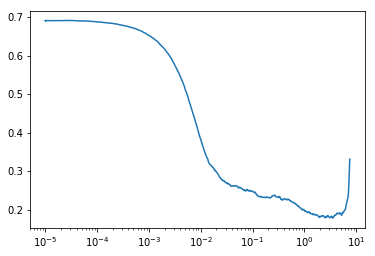

In [10]:
lrf.plot()

In [9]:
learn.fit(2, 0.6, cycle_len=1)

[0.1402560054118707, 0.12817703, 0.88974559]


[0.13801740161276274, 0.12366696, 0.89422131]



In [10]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(2, 0.15*(i-3), cycle_len=1)

[0.1210927586082477, 0.10907844, 0.9095757]


[0.11901475240599765, 0.10428328, 0.91339046]



[0.1052469369247534, 0.10313218, 0.91538072]


[0.10768648436876467, 0.10054807, 0.91701359]



[0.10318934029427672, 0.09947446, 0.91860509]


[0.10575038012942933, 0.098621607, 0.91853583]



In [11]:
learn.unfreeze()

In [12]:
learn.fit(1, 0.2, cycle_len=1)

[0.11106639049492464, 0.10012414, 0.91805816]



In [13]:
learn.fit(1, 1e-2, cycle_len=1)

[0.10276877574588993, 0.099583156, 0.91805327]



In [14]:
learn.fit(20, 0.2, cycle_len=5)

[0.1174190328945579, 0.12622005, 0.89250797]


[0.10597306123719903, 0.10324, 0.91531163]


[0.10230095173667682, 0.098687246, 0.91847438]


[0.09777872435820999, 0.096440889, 0.91942698]


[0.09489992766596139, 0.094537728, 0.92291045]


[0.11218612369995891, 0.10719223, 0.90700805]


[0.10834817266803497, 0.099739991, 0.91868907]


[0.0969859623125394, 0.10008015, 0.91787457]


[0.09299706706901882, 0.095236391, 0.92147034]


[0.09574596017344235, 0.093863532, 0.92316741]


[0.1082273937014627, 0.10648964, 0.911026]


[0.09714581119384194, 0.10215106, 0.91597927]


[0.09406299516051947, 0.096311472, 0.92090809]


[0.09607389669585334, 0.094526798, 0.92166054]


[0.0937469538033069, 0.092795722, 0.92487234]


[0.10532620751893366, 0.10160089, 0.91707641]


[0.09740872988575426, 0.10112096, 0.91603673]


[0.09764313246482002, 0.095503055, 0.92150456]


[0.09060204709826648, 0.094528846, 0.92203969]


[0.0924344905009968, 0.093332984, 0.92387354]



In [15]:
learn.save('rn34_0-64')

In [40]:
tfms = ClassifierData.tfms_from_model(f_model, 128, aug_tfms=transforms_top_down, max_zoom=1.05)

In [41]:
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [42]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [43]:
learn.load('rn34_0-64')

In [44]:
learn.fit(2, 0.3, cycle_len=1)

233/|/ 35%|| 233/675 [00:37<01:10,  6.28it/s, loss=0.415][0.0994746370453422, 0.098181188, 0.91746628]


[0.09551015089251673, 0.096411146, 0.91948915]


In [45]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(1, 0.1*(i-3), cycle_len=1)

[0.09496469666087784, 0.088030808, 0.92852938]


[0.09472439306100608, 0.08728902, 0.92890614]


[0.0902921048573635, 0.086205587, 0.93022537]


In [46]:
learn.unfreeze()

In [47]:
learn.fit(1, 0.2, cycle_len=1)

[0.08816218732299512, 0.08652918, 0.93043882]


In [48]:
learn.fit(12, 0.2, cycle_len=3)

[0.09388392683658207, 0.092484936, 0.92360771]


[0.08976940557233441, 0.086494185, 0.9300223]


[0.08255269491616439, 0.085227191, 0.93091857]


[0.09248776873584451, 0.091276884, 0.92486465]


[0.0862819673098729, 0.085387155, 0.9306702]


[0.08174864755732797, 0.086540334, 0.92983568]


[0.08988401622174526, 0.09006539, 0.92474335]


[0.08847288988446636, 0.08614248, 0.93025875]


[0.07883448427693189, 0.084442072, 0.93147856]


[0.09178105459263103, 0.088631742, 0.92832088]


[0.08326148274205157, 0.084689319, 0.93025875]


[0.07951880034286124, 0.084506378, 0.93167549]


In [49]:
learn.save('rn34_0-128')

In [8]:
tfms = ClassifierData.tfms_from_model(f_model, 244, aug_tfms=transforms_top_down, max_zoom=1.05)
data = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, tfms, 
                             suffix='.jpg', val_idxs=val_idxs)

In [9]:
learn = Learner.pretrained_convnet(f_model, data, metrics=metrics,
           opt_fn=SGD_Momentum(0.9), ps=[0.25,0.5], xtra_fc=[512])

In [10]:
learn.load('rn34_0-128')

In [11]:
learn.fit(2, 0.3, cycle_len=1)

[0.10985439421517999, 0.1049061, 0.91948915]


[0.09680714637821156, 0.093764693, 0.92251277]



In [12]:
for i in range(6,3,-1):
    learn.freeze_to(i)
    learn.fit(1, 0.1*(i-3), cycle_len=1)

[0.09398950231320213, 0.086390637, 0.93040085]



[0.08959137580738744, 0.084961191, 0.93086278]



[0.0881875749828362, 0.084346205, 0.93108267]



In [13]:
learn.unfreeze()

In [14]:
learn.fit(12, 0.2, cycle_len=3)

[0.0923566209659454, 0.088330545, 0.92988539]


[0.08801011196388603, 0.08384797, 0.93240672]


[0.08701116266236986, 0.082741052, 0.933321]


[0.09576737720616638, 0.086985022, 0.92966205]


[0.09127054783565614, 0.083720826, 0.93222886]


[0.08301890009881499, 0.082933202, 0.9323988]


[0.09147117934225159, 0.088995188, 0.92775768]


[0.08671711163906187, 0.083067842, 0.93334556]


[0.07944740582392779, 0.082439952, 0.93313462]


[0.08961383564174076, 0.085991859, 0.93047976]


[0.08367104864542069, 0.083714224, 0.9314537]


[0.08572208913590454, 0.082403526, 0.93341345]



In [15]:
learn.save('rn34_0-244')

### Import data

In [15]:
tfm=image_gen(noop, 64, pad=6)
ds = ClassifierData.from_csv(path+'train-jpg', f'{path}train_v2.csv', bs, [1,2,3], (tfm,tfm),
               suffix='.jpg')

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
x,y=next(iter(ds.val_dl))
im=x[0].numpy()
plt.imshow(im)

In [ ]:
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

In [ ]:
PIL.Image.open(ds.val_dl.dataset.fnames[0])